In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modelo de Regressão Linear Múltipla <br> 
## DIAGNÓSTICO DE HETEROCEDASTICIDADE

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Fávero e Belfiore

Correlação entre o termo de erro e a variável explicativa. No exemplo, temos uma figura de um cone entre SAEB e rendimento.

**corr[X,u] <> 0 -> existe heterocedasticidade (correlação estatisticamente diferente de 0)**

Variância não constante dos termos de erro ao longo de X ou ao longo de Yhat se tiver mais de uma variável X.

**Sobre o fenômeno da Heterocedasticidade podemos afirmar:**

- É decorrente da omissão de variáveis preditoras significativas no modelo final estimado;
- Pode ser reduzido por meio da inclusão de variáveis preditoras de Y cuja os parâmetros Beta se mostrarem estatisticamente significantes após o procedimento stepwise;
- Os termos de erro serão heterocedásticos quando eles estiverem fazendo as vezes de variáveis preditoras significantes para a explicação do comportamento de Y que foram omitidas no modelo final estimado e se fossem consideradas ficariam no modelo após o procedimento stepwise;



## Aplicação MQO (OLS)

1) Estimação do modelo linear com stepwise<br>
2) Aplica teste Shapiro Francia nos resíduos:<br>
- Deu aderência à normalidade? Modelo validado <br>
- Não deu aderência à normalidade? Aplica transformação Box-Cox <br>

3) Aplica modelo novamente com stepwise<br>
4) Aplica teste shapiro Francia novamente nos resíduos:



## Contexto

Censo escolar da educação básica do Brasil.
SAEB - sistema de avaliação da educação básica: reflete níveis de aprendizagem dos estudantes
Ensino Fundamental do 6o ao 9o ano.
Rendimento: aprovação, reprovação ou abandono (fluxo).

SAEB ~ rendimento

In [2]:
#Importa base e transforma em objeto
saeb_rend = pd.read_csv(r'bases\saeb_rend.csv')
saeb_rend['codigo'] = saeb_rend['codigo'].astype('str')
saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629
...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156


In [3]:
saeb_rend.describe()

,saeb,rendimento
count,25538.000000,37324.000000
mean,5.047511,0.856967
std,0.753718,0.110447
min,2.053000,0.247282
25%,4.554542,0.791561
50%,5.069500,0.878536
75%,5.551458,0.944761
max,8.588000,1.000000


In [4]:
saeb_rend.groupby('uf')['municipio'].count()

uf
AC     204
AL     718
AM     972
AP     172
BA    3539
CE    2971
DF     217
ES     831
GO    1400
MA    2761
MG    4399
MS     643
MT     966
PA    2046
PB    1075
PE    1866
PI    1289
PR    1886
RJ    2310
RN     859
RO     468
RR     128
RS    3315
SC    1742
SE     562
SP    5753
TO     515
Name: municipio, dtype: int64

In [5]:
saeb_rend.groupby('rede')['municipio'].count()

rede
Estadual     20959
Federal         38
Municipal    22610
Name: municipio, dtype: int64

## Gráfico de Dispersão 

Figura de um cone é um indício de heterocedasticidade.

Não necessariamente prejudica a previsão do modelo, nesse caso quanto mairo o X pode dificultar a previsibilidade já que o erro é maior em relação a valores menores de X.

Em alguns valores de X pode inclusive ajudar na previsibilidade. 

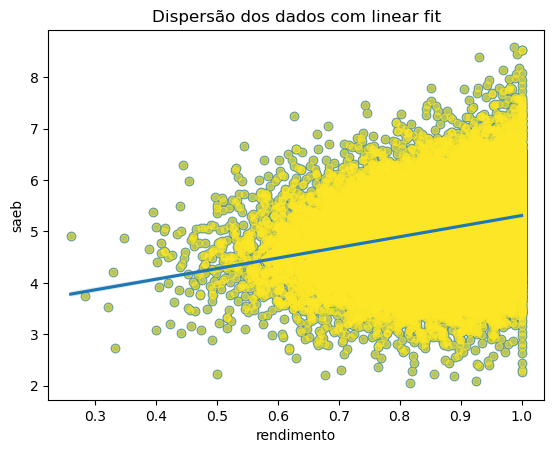

In [7]:
# In[ ]: Plotando 'saeb' em função de 'rendimento', com linear fit

x = saeb_rend['rendimento']
y = saeb_rend['saeb']
plt.plot(x, y, 'o', color='#FDE725FF', markersize=5, alpha=0.6)
sns.regplot(x="rendimento", y="saeb", data=saeb_rend)
plt.title('Dispersão dos dados com linear fit')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

<AxesSubplot:xlabel='rendimento', ylabel='saeb'>

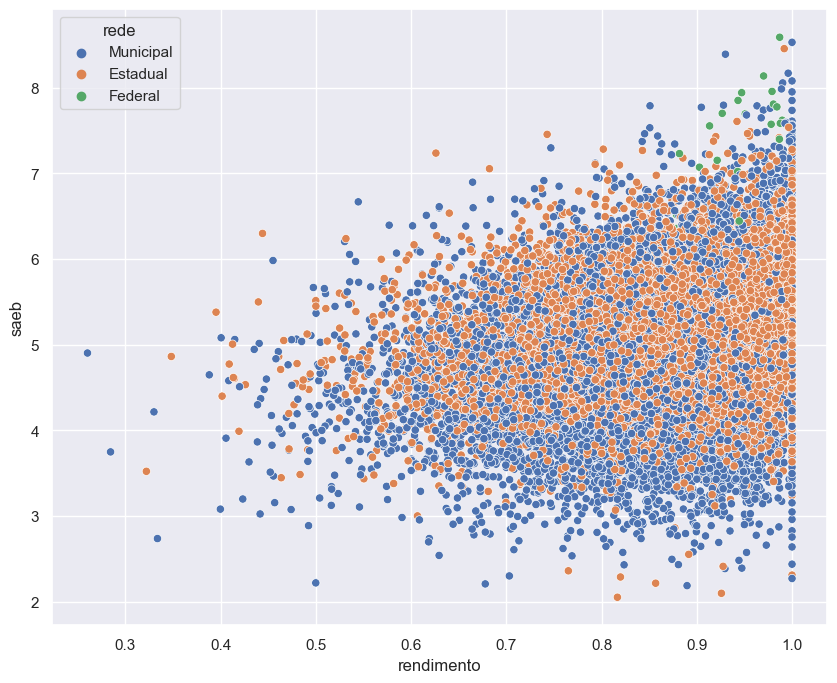

In [7]:
sns.scatterplot(saeb_rend.rendimento, saeb_rend.saeb, hue= saeb_rend.rede)

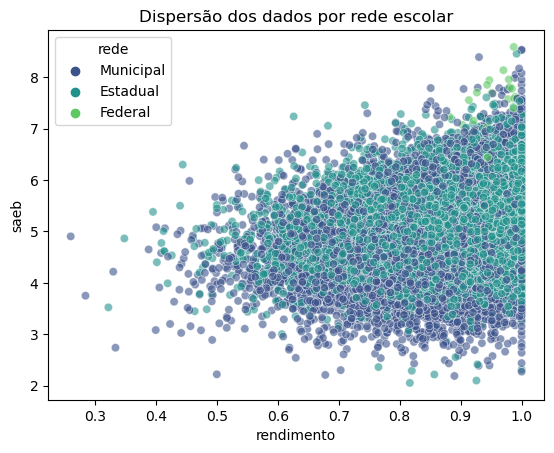

In [8]:
# In[ ]: Plotando 'saeb' em função de 'rendimento',
#com destaque para 'rede' escolar

sns.scatterplot(x="rendimento", y="saeb", data=saeb_rend,
                hue="rede", alpha=0.6, palette = "viridis")
plt.title('Dispersão dos dados por rede escolar')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

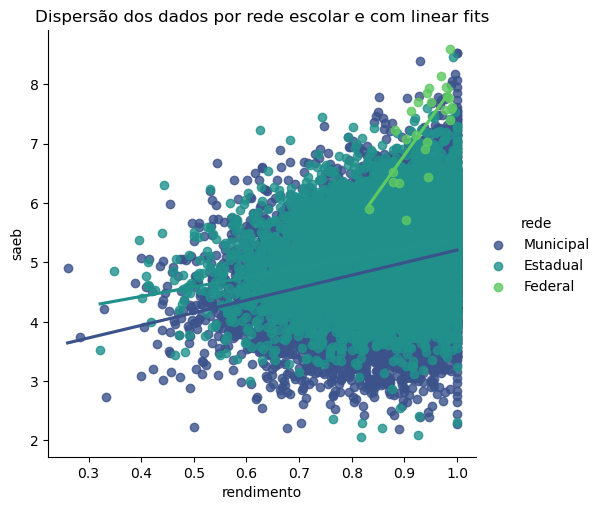

In [9]:
# In[ ]: Plotando 'saeb' em função de 'rendimento',
#com destaque para 'rede' escolar e linear fits

sns.lmplot(x="rendimento", y="saeb", data=saeb_rend,
           hue="rede", ci=None, palette="viridis")
plt.title('Dispersão dos dados por rede escolar e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

## Diagnóstico de Heterocedasticidade

R2 baixo em decorrência da Heterocedasticidade. <br>
Esse é o modelo do Primeiro Gráfico.

Significância estatística com R2 baixo é indício de heterocedasticidade.

In [10]:
#Estimando o modelo
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
import statsmodels.api as sm

modelosaeb = sm.OLS.from_formula(formula = 'saeb ~ rendimento', data=saeb_rend).fit()
modelosaeb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:28:07   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2425      0.039     82.277      0.000       3.165       3.320
rendimento     2.0665      0.045     46.111      0.000       1.979       2.154
==============================================================================
Omnibus:                      152.496   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.269
Skew:                          -0.091   Prob(JB):                     1.97e-44
Kurtosis:                       3.395   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Teste de Breusch-Pagan

> H0: Ausência de heterocedasticidade

> H1: heterocedasticidade, ou seja, correlação entre resíduos e uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

P-value < 0,05 existe heterocedasticidade <br>
P-value >= 0,05 é homogênio

In [11]:
from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

In [12]:
breusch_pagan_test(modelosaeb)

chisq: 16.720700325953388
p-value: 4.5651903149386794e-05


(16.720700325953388, 4.5651903149386794e-05)

### ---------------------------------Breush-Pagen Manual---------------------------------------

In [10]:
saeb_rend['yhat'] = modelosaeb.fittedvalues
saeb_rend['resid'] = modelosaeb.resid
saeb_na = saeb_rend.dropna(axis=0, subset='saeb')
saeb_rend['up'] = ((saeb_na.resid.dropna()**2)/ ((sum(saeb_na.resid.dropna()**2))/(25530)))
saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento,yhat,resid,up
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,4.825556,0.506278,0.488848
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,NaN,NaN,NaN
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,5.070567,0.361767,0.249605
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,NaN,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,5.221359,0.347474,0.230272
...,...,...,...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,5.113792,0.344208,0.225964
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,5.066579,-0.170913,0.055711
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,4.982381,0.209286,0.083536
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,4.825688,0.331978,0.210192


### ANOVA

In [11]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=saeb_rend, res_var='up', anova_model=f'up ~ yhat')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,33.441401,33.441401,13.966877,0.000186
Residual,25528.0,61122.616057,2.394336,NaN,NaN


In [12]:
from scipy.stats import chi2

mean = 33.441401/2

p = 1- chi2.cdf(mean, 1)

In [13]:
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 16.7207005
P-value: 4.330588881340525e-05


P-value < 0,05 - existe heterocedasticidade

### -----------------------------------------------------------------------------------------------

## Inserindo as Variáveis Dummies UF

Tentar mitigar a heterocedasticidade para melhorar a acurácida do modelo. <br>
Ainda existem variáveis relevantes para melhorar o modelo.

In [22]:
saeb_rend_dummies_uf = pd.read_csv(r'bases\saeb_rend.csv')

saeb_rend_dummies_uf = pd.get_dummies(saeb_rend_dummies_uf, columns=['uf'],
                                      drop_first=False)
saeb_rend_dummies_uf.head(10)

,municipio,codigo,escola,rede,saeb,rendimento,uf_AC,uf_AL,uf_AM,uf_AP,...,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RR,uf_RS,uf_SC,uf_SE,uf_SP,uf_TO
0,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Alta Floresta D'Oeste,11025077,EMEIEF MARIA DE SOUZA PEGO,Municipal,5.152833,0.897852,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Alta Floresta D'Oeste,11025115,EMEIEF MARTIM AFONSO DE SOUZA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Alta Floresta D'Oeste,11025310,EMEIEF PEDRO ALEIXO,Municipal,5.608333,0.599606,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,Alta Floresta D'Oeste,11025352,EMEIEF POTY,Municipal,4.617000,0.799311,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Alta Floresta D'Oeste,11025620,EEEF TANCREDO DE ALMEIDA NEVES,Estadual,NaN,0.916305,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
saeb_rend_dummies_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   municipio   43607 non-null  object 
 1   codigo      43607 non-null  int64  
 2   escola      43607 non-null  object 
 3   rede        43607 non-null  object 
 4   saeb        25538 non-null  float64
 5   rendimento  37324 non-null  float64
 6   uf_AC       43607 non-null  uint8  
 7   uf_AL       43607 non-null  uint8  
 8   uf_AM       43607 non-null  uint8  
 9   uf_AP       43607 non-null  uint8  
 10  uf_BA       43607 non-null  uint8  
 11  uf_CE       43607 non-null  uint8  
 12  uf_DF       43607 non-null  uint8  
 13  uf_ES       43607 non-null  uint8  
 14  uf_GO       43607 non-null  uint8  
 15  uf_MA       43607 non-null  uint8  
 16  uf_MG       43607 non-null  uint8  
 17  uf_MS       43607 non-null  uint8  
 18  uf_MT       43607 non-null  uint8  
 19  uf_PA       43607 non-nul

### Modelo Com Variável UF

In [25]:
# Definição da fórmula utilizada no modelo
lista_colunas = list(saeb_rend_dummies_uf.drop(columns=['municipio',
                                                        'codigo',
                                                        'escola',
                                                        'rede',
                                                        'saeb',
                                                        'uf_SP']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "saeb ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

Fórmula utilizada:  saeb ~ rendimento + uf_AC + uf_AL + uf_AM + uf_AP + uf_BA + uf_CE + uf_DF + uf_ES + uf_GO + uf_MA + uf_MG + uf_MS + uf_MT + uf_PA + uf_PB + uf_PE + uf_PI + uf_PR + uf_RJ + uf_RN + uf_RO + uf_RR + uf_RS + uf_SC + uf_SE + uf_TO


In [26]:
modelo_dummies_uf = sm.OLS.from_formula(formula_dummies_modelo,
                                               saeb_rend_dummies_uf).fit()
modelo_dummies_uf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     497.5
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:37:42   Log-Likelihood:                -23604.
No. Observations:               25530   AIC:                         4.726e+04
Df Residuals:                   25502   BIC:                         4.749e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1937      0.043     96.607      0.000       4.109       4.279
rendimento     1.2444      0.044     28.057      0.000       1.157       1.331
uf_AC         -0.4371      0.059     -7.448      0.000      -0.552      -0.322
uf_AL         -0.6051      0.032    -19.040      0.000      -0.667      -0.543
uf_AM         -0.6851      0.027    -25.180      0.000      -0.738      -0.632
uf_AP         -0.9728      0.071    -13.694      0.000      -1.112      -0.834
uf_BA         -0.6823      0.019    -35.401      0.000      -0.720      -0.644
uf_CE         -0.0780      0.017     -4.568      0.000      -0.111      -0.045
uf_DF          0.0054      0.059      0.093      0.926      -0.110       0.121
uf_ES          0.1472      0.029      5.087      0.000       0.090       0.204
uf_GO          0.0564      0.022      2.517      0.012       0.012       0.100
uf_MA         -1.1074      0.020    -56.413      0.000      -1.146      -1.069
uf_MG         -0.0388      0.016     -2.421      0.015      -0.070      -0.007
uf_MS          0.1014      0.035      2.889      0.004       0.033       0.170
uf_MT         -0.5207      0.030    -17.443      0.000      -0.579      -0.462
uf_PA         -0.8999      0.021    -42.020      0.000      -0.942      -0.858
uf_PB         -0.5284      0.029    -18.298      0.000      -0.585      -0.472
uf_PE         -0.4650      0.021    -21.877      0.000      -0.507      -0.423
uf_PI         -0.5455      0.024    -22.289      0.000      -0.593      -0.498
uf_PR          0.1759      0.022      8.093      0.000       0.133       0.219
uf_RJ         -0.0426      0.021     -2.004      0.045      -0.084      -0.001
uf_RN         -0.5367      0.036    -14.790      0.000      -0.608      -0.466
uf_RO         -0.0490      0.037     -1.323      0.186      -0.122       0.024
uf_RR         -0.7258      0.089     -8.174      0.000      -0.900      -0.552
uf_RS          0.2775      0.019     14.766      0.000       0.241       0.314
uf_SC          0.2558      0.021     12.228      0.000       0.215       0.297
uf_SE         -0.4444      0.036    -12.407      0.000      -0.515      -0.374
uf_TO         -0.3182      0.035     -9.002      0.000      -0.388      -0.249
==============================================================================
Omnibus:                      575.254   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.751
Skew:                           0.147   Prob(JB):                    1.58e-244
Kurtosis:                       3.984   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Teste de Breusch-Pagan

Houve uma melhora no modelo após inserir a variável UF. <br>

**Não existe mais Heterodasticidade**


Mudando a referência da variável Dummy, não altera o teste Breusch-Pagen

In [17]:
saeb_na_dum['yhat'] = modelo_dummies_uf.predict(X)
saeb_na_dum['resid'] = saeb_na_dum['saeb'] - saeb_na_dum['yhat']
saeb_na_dum['up'] = ((saeb_na_dum.resid**2)/ ((sum(saeb_na_dum.resid**2))/(25530)))

In [18]:
res.anova_stat(df=saeb_na_dum, res_var='up', anova_model=f'up ~ yhat')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
yhat,1.0,2.151248,2.151248,0.720861,0.39587
Residual,25528.0,76182.579747,2.984275,NaN,NaN


In [19]:
from scipy.stats import chi2

mean = 2.151248/2
p = 1- chi2.cdf(mean, 1)

In [20]:
# Resultado teste Breush-Pagen

print(f'Chi2: {mean}')
print(f'P-value: {p}')

Chi2: 1.075624
P-value: 0.29967856375074586


In [27]:
breusch_pagan_test(modelo_dummies_uf)

chisq: 1.0756241898380712
p-value: 0.4493046942889593


(1.0756241898380712, 0.4493046942889593)

<AxesSubplot:xlabel='rendimento', ylabel='saeb'>

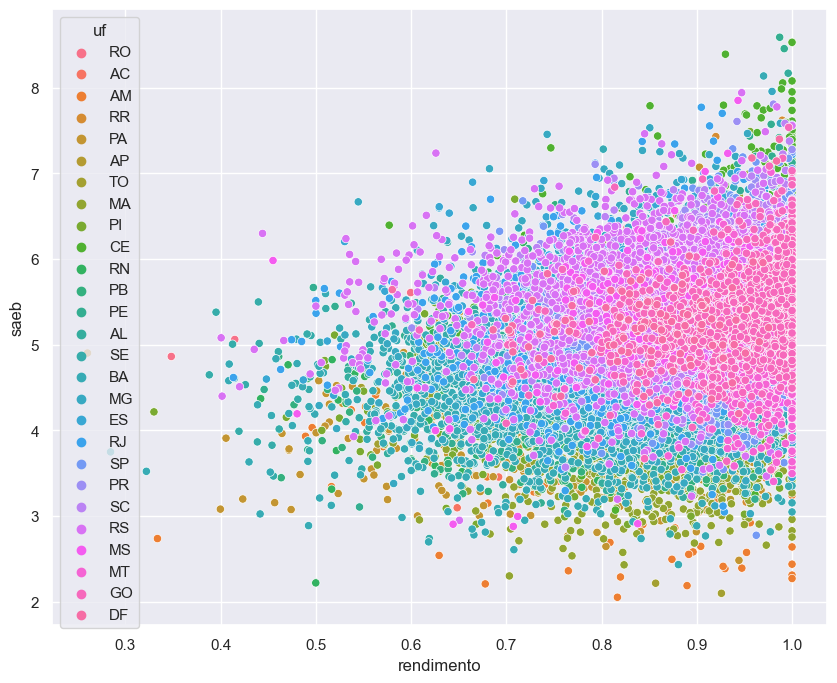

In [21]:
sns.scatterplot(saeb_rend.rendimento, saeb_rend.saeb, hue= saeb_rend.uf)

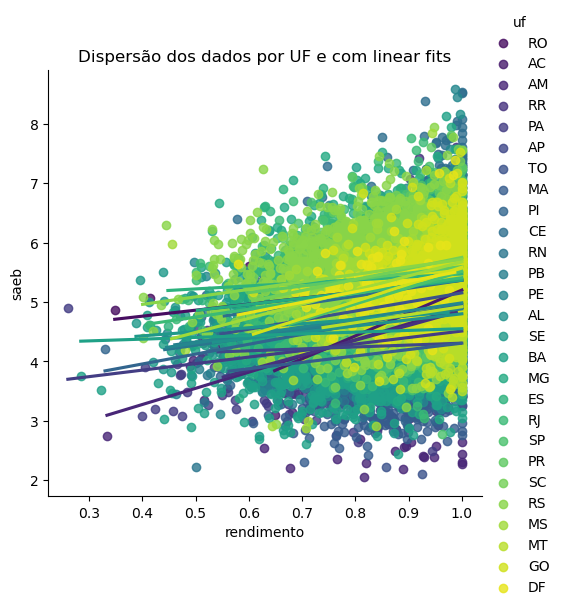

In [28]:
# Plotando 'saeb' em função de 'rendimento',
#com destaque para UFs e linear fits

sns.lmplot(x="rendimento", y="saeb", data=saeb_rend,
           hue="uf", ci=None, palette="viridis")
plt.title('Dispersão dos dados por UF e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()